# **Spam Detection System Project**

**Importing the Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Data Loading**

In [2]:
df=pd.read_csv('spam.csv', encoding='ISO-8859-1')

**Data First View**

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  5572
Number of columns are:  5


**Data Information**

In [5]:
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


**Duplicate Values**

In [6]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are: {dup}')

number of duplicated rows are: 403


**Missing Values**

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [8]:
# Dataset Describe (all columns included)
df.describe(include= 'all')

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [9]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in v1 is 2
No. of unique values in v2 is 5169
No. of unique values in Unnamed: 2 is 43
No. of unique values in Unnamed: 3 is 10
No. of unique values in Unnamed: 4 is 5


**Data Wrangling**

In [10]:
# Change the v1 & v2 columns as Category and Message
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [11]:
# Removing the all unnamed columns
df.drop(columns={'Unnamed: 2','Unnamed: 3','Unnamed: 4'}, inplace=True)

In [12]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# Creating a binary 'Spam' column:
# 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
df['Spam'] = df['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [14]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


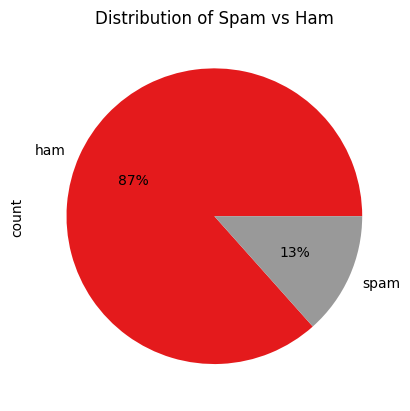

In [15]:
# Chart - 1 Pie Chart Visualization For Distribution of Spam vs Ham Messages
spread = df['Category'].value_counts()
spread.plot(kind = 'pie', autopct='%.0f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')
plt.show()

**From the above chart, we got to know that the dataset contain 13.41% of spam messages and 86.59% of ham messages.**

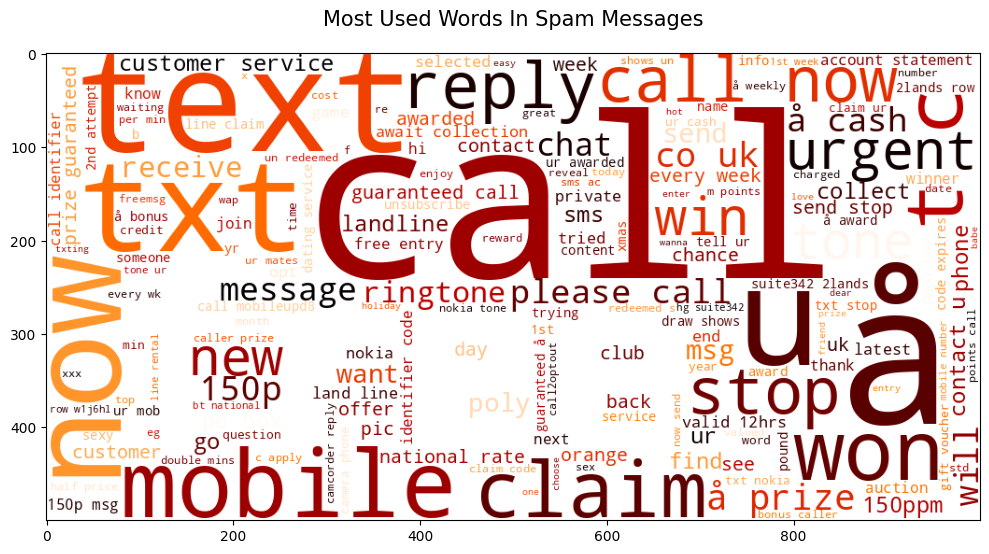

In [16]:
from wordcloud import WordCloud, STOPWORDS

# Splitting Spam Messages
df_spam = df[df['Category']=='spam'].copy()

# a single string of all words from spam messages
comment_words = ' '.join(df_spam['Message'].astype(str)).lower()

# Define stopwords
stopwords = set(STOPWORDS)

# Generating the word cloud
wordcloud = WordCloud(width=1000, height=500,
                      background_color='white',
                      stopwords=stopwords,
                      min_font_size=8,
                      max_words=1000,
                      colormap='gist_heat_r').generate(comment_words)


plt.figure(figsize=(10, 6))
plt.title('Most Used Words In Spam Messages', fontsize=15, pad=20)
plt.imshow(wordcloud)
plt.tight_layout()
plt.show()

**From the above wordcloud plot, we got to know that the 'free', 'call', 'ask', 'txt', 'well' and 'now' are most used words in spam messages.**

In [17]:
# Import model selection library
from sklearn.model_selection import train_test_split

In [18]:
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.25,random_state=24)

**ML Model Implementation**

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve
)

In [20]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plotting ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.figure(figsize=(8, 6))
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)


    fig, ax = plt.subplots(1, 2, figsize=(11,4))
    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())

    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [21]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),  # Step 1: Text data transformation
    ('nb', MultinomialNB())  # Step 2: Classification using Naive Bayes
])


Train ROC AUC: 0.9829745788154468
Test ROC AUC: 0.9630834974162319


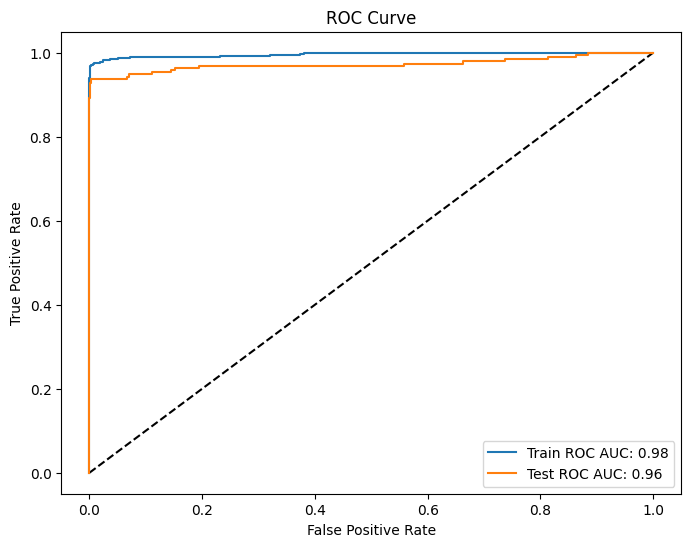


Confusion Matrix:


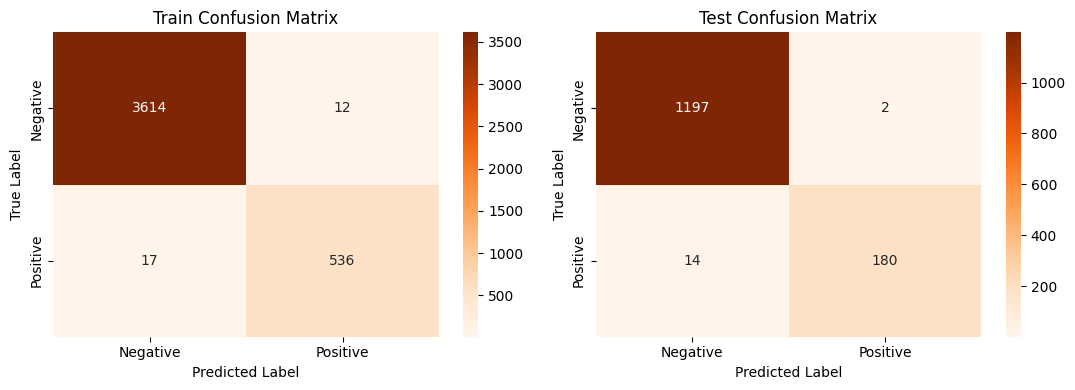


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.995318 | 0.996691 |   0.996004 | 3626        |
| 1            |    0.978102 | 0.969259 |   0.97366  |  553        |
| accuracy     |    0.993061 | 0.993061 |   0.993061 |    0.993061 |
| macro avg    |    0.98671  | 0.982975 |   0.984832 | 4179        |
| weighted avg |    0.99304  | 0.993061 |   0.993047 | 4179        |

Test Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.988439 | 0.998332 |   0.993361 | 1199        |
| 1            |    0.989011 | 0.927835 |   0.957447 |  194        |
| accuracy     |    0.988514 | 0.988514 |   0.988514 |    0.988514 |
| macro avg    |    0.988725 | 0.963083 |   0.975404 | 1393        |
| weighted avg |    0.988519 | 0.988514 |   

In [22]:
# Visualizing evaluation Metric Score chart
MultinomialNB_score = evaluate_model(clf, X_train, X_test, y_train, y_test)

After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected recall as the primary evaluation metric for our email spam detection model. Its gives 98 % accuracy for recall test set.

**Email Spam Detection System**

In [24]:
def detect_spam(email_text, model):
    if model is None:
        return "Error: Classifier not loaded. Please load your model."

    prediction = model.predict([email_text])

    if prediction[0] == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"

# Example usage
# sample_email =''' Subject: Congratulations! You’ve Won a $1,000 Gift Card!

# From: "Rewards Team" rewards@shoppingdeals.com
# To: example23@gmail.com
# Date: 12-05-2025

# Dear Winner,

# You have been selected as the lucky recipient of a $1,000 Amazon Gift Card! To claim your prize,
# please click the link below and complete the short verification form:

# Hurry! This offer is valid for the next 48 hours only.

# Thank you for being a valued customer.

# Best regards,
# Rewards Team
# Shopping Deals Inc.'''

sample_email= "Hey, can we connect today"

result = detect_spam(sample_email, clf)
print(result)

This is a Ham Email!
